In [64]:
import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt

In [65]:
# Physical constants
q_ozone = 7.96e17  # Specific concentration of ozone [molecules/cm^2]
p_s = 101325  # Surface pressure [Pa]
g = 9.80665  # Standard acceleration due to gravity [m/s^2]

In [116]:
# Dictionary of absorption coefficients kappa [cm^2 / molecule] for the UVA, UVB, and UVC.
kappa_dict = {
    'A': 1e-21,
    'B': 1e-19,
    'C': 1e-17,
    'B-': 3e-19,
    'B+': 1e-20
}

def T_X(band, zeta):
    kappa = kappa_dict[band]
    tau = kappa * q_ozone * p_s / g
    return np.exp(-tau/np.cos(zeta))

def log_T_X(band, zeta):
    kappa = kappa_dict[band]
    tau = kappa * q_ozone * p_s / g
    return -tau/np.cos(zeta)

def T_X_mp(band, zeta):
    kappa = kappa_dict[band]
    tau = kappa * q_ozone * p_s / g
    return mp.exp(-tau/np.cos(zeta))

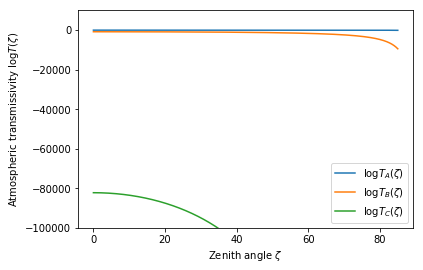

In [118]:
# Problem 1(b)
# Plotting UV atmospheric transmissivities for ozone.
bands = ['A', 'B', 'C']
zeta_values = np.deg2rad(np.linspace(0, 85, 1000))

for band in bands:
    T_X_values = list(map(lambda zeta: log_T_X(band=band, zeta=zeta), zeta_values))
    plt.plot(np.rad2deg(zeta_values), T_X_values, label=r'$\log T_{:s}(\zeta)$'.format(band))

plt.xlabel(r'Zenith angle $\zeta$')
plt.ylabel(r'Atmospheric transmissivity $\log T(\zeta)$')
plt.ylim([-1e5, 1e4])
plt.legend()
plt.show()

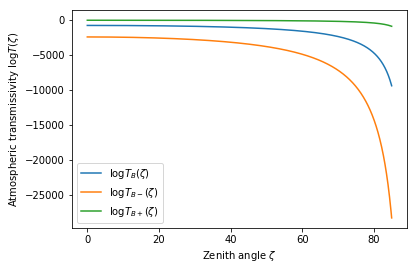

In [124]:
# Problem 2(b)
# Plotting UV atmospheric transmissivities for ozone in three parts of the UVB spectrum.
bands = ['B', 'B-', 'B+']
zeta_values = np.deg2rad(np.linspace(0, 85, 1000))

for band in bands:
    T_X_values = list(map(lambda zeta: log_T_X(band=band, zeta=zeta), zeta_values))
    plt.plot(np.rad2deg(zeta_values), T_X_values, label=r'$\log T_{{{:s}}}(\zeta)$'.format(band))

plt.xlabel(r'Zenith angle $\zeta$')
plt.ylabel(r'Atmospheric transmissivity $\log T(\zeta)$')
plt.legend()
plt.show()
